# Linkabilty Risk examples

In [1]:
import os
import sys

#Append to PYTHONPATH
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(path)

from leakpro.synthetic_data_attacks.anonymeter.evaluators.linkability_evaluator import LinkabilityEvaluator
from leakpro.synthetic_data_attacks.linkability_utils import linkability_risk_evaluation, load_linkability_results
from leakpro.synthetic_data_attacks.plots import plot_linkability
from leakpro.tests.tests_synthetic_data_attacks.anonymeter_tests.fixtures import get_adult

#Get ori and syn
ori = get_adult(return_ori=True, n_samples=100)
syn = get_adult(return_ori=False, n_samples=100)

## Basic example

A very basic example requires an original (`ori`) and a synthetic (`syn`) pandas dataframes.

Afterwards, instantiate the evaluator and run `evaluate` and `print_results` methods.

**Note:** adjust `n_attacks` as needed, default value is `n_attacks=2_000`

In [2]:
evaluator = LinkabilityEvaluator(
    ori = ori,
    syn = syn,
    aux_cols = [["age", "education"],["race"]],
    n_attacks = 100
)
results = evaluator.evaluate()
results.print_results()

Success rate of main attack (and nr and total): 5.70%, 4, 100
Success rate of naive attack (and nr and total): 1.85%, 0, 100
Residual rate: 3.92%


## Full linkablity risk evaluation

Perform a full linkability risk evaluation. Requires an original (`ori`) and a synthetic (`syn`) pandas dataframes. In example, results are saved to `json` file to later plot them.

**Note:** adjust `n_samples` and `n_attacks` as needed. Default values are: `n_samples=300, n_attacks=2_000`

In [3]:
#Perform linkability risk evaluation and save results
full_link_res = linkability_risk_evaluation(
    dataset = "adults",
    ori = get_adult(return_ori=True, n_samples=100),
    syn = get_adult(return_ori=False, n_samples=100),
    n_samples = 100,
    n_attacks = 300,
    verbose = True,
    save_results_json = True
)


Running linkability risk evaluation for `adults` with len(columns)=14
Evaluating linkability combination (and total) 0 1291
Evaluating linkability combination (and total) 100 1291
Evaluating linkability combination (and total) 200 1291
Evaluating linkability combination (and total) 300 1291
Evaluating linkability combination (and total) 400 1291
Evaluating linkability combination (and total) 500 1291
Evaluating linkability combination (and total) 600 1291
Evaluating linkability combination (and total) 700 1291
Evaluating linkability combination (and total) 800 1291
Evaluating linkability combination (and total) 900 1291
Evaluating linkability combination (and total) 1000 1291
Evaluating linkability combination (and total) 1100 1291
Evaluating linkability combination (and total) 1200 1291

### Results saved! res_linkability_adults.json


In [4]:
#Get full linkability risk results from json file
full_link_res = load_linkability_results(dataset="adults")

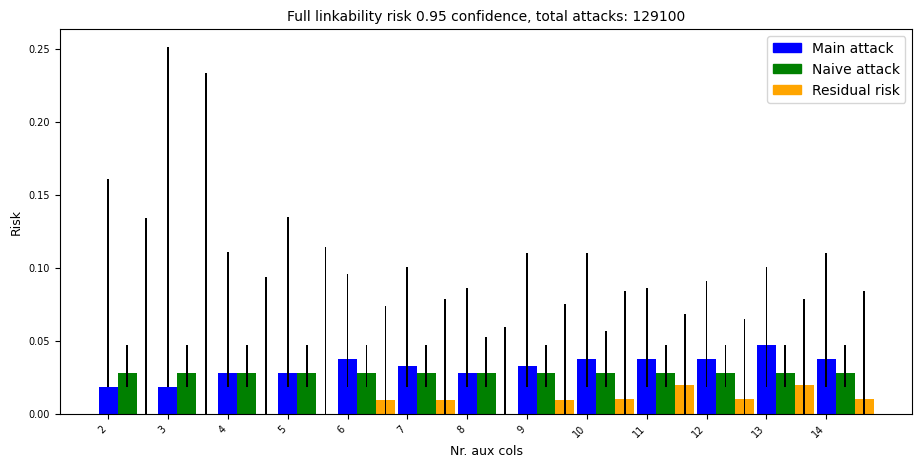

In [5]:
#Plot linkability results
plot_linkability(full_link_res=full_link_res)